In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/TDM_project/Walmart.csv')

In [4]:
#print the first 5 rows of the dataset
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#print the info of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Identify Qualitative Attributes
qualitative_attributes = df1.select_dtypes(include=['object', 'category']).columns.tolist()
print("Qualitative (categorical) attributes:", qualitative_attributes)

Qualitative (categorical) attributes: ['Date']


In [7]:
# Identify quantitative (numerical) attributes
quantitative_attributes = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Quantitative (numerical) attributes:", quantitative_attributes)

Quantitative (numerical) attributes: ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [8]:
# change date column data type from categorical to numerical

# change the date format to datatime format
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)

# Extract numeric features
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day
df1['Week'] = df1['Date'].dt.isocalendar().week
df1['DayOfWeek'] = df1['Date'].dt.dayofweek

df1['Date_Ordinal'] = pd.to_datetime(df1['Date'], dayfirst=True).map(lambda x: x.toordinal())

# recheck the datetime format
df1['Date']

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
6430,2012-09-28
6431,2012-10-05
6432,2012-10-12
6433,2012-10-19


In [9]:
#check for columns with missing values
df1.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Year,0
Month,0


In [10]:
# check if there are duplicates row
duplicate_rows_df = df1[df1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
# Print the duplicate rows.
duplicate_rows_df

number of duplicate rows:  (0, 14)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Week,DayOfWeek,Date_Ordinal


- there is no duplicate rows

In [11]:
df1.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Week,DayOfWeek,Date_Ordinal
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.0,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,15.678322,25.818182,4.0,734305.000000
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000,1.0,4.0,733808.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,8.000000,14.0,4.0,734053.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,16.000000,26.0,4.0,734305.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,23.000000,38.0,4.0,734557.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,31.000000,52.0,4.0,734802.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,8.755780,14.129201,0.0,288.979199


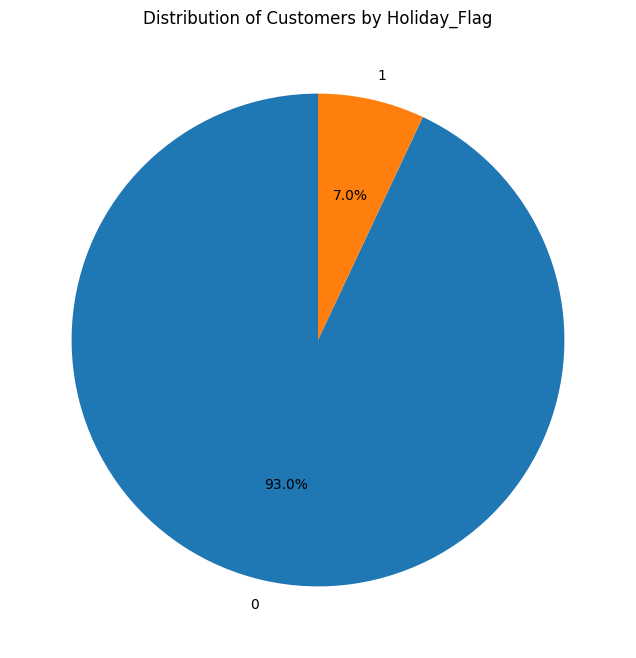

In [12]:
# count the occurrences of each weekly sales
region_counts = df1['Holiday_Flag'].value_counts()

# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customers by Holiday_Flag')

# show the plot
plt.show()

<br>- 7.0% of customer are Holiday_Flag is 1
<br>- 93.0% of customers Holiday_Flag is 0
<br>- Week 0 is nonholiday week while Week 1 is Holiday
<br> Thus, the pie chart shows the customer tend to go to Walmart during non-holiday.

##Feature Engineering